In [1]:
from operator import itemgetter
from collections import Counter

from PIL import Image, ImageFilter
from IPython.display import Image as imgp
import cv2, pytesseract
from matplotlib.pyplot import imshow

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

import requests
from selenium import webdriver
from bs4 import BeautifulSoup

import re

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from statistics import mode

import math
# import smtplib
# import time

%matplotlib inline

In [2]:
from functions import * 

# I. FUNCTIONS

In [3]:
# # funtions for image pre-processing  *** should create one for resizing 

# def image_rotate(image_r, angle):
    
#     w = image_r.shape[1]
#     h = image_r.shape[0]

#     if angle not in [90,180,270]: return(image_r)
    
#     if(angle == 90):
#         center = (w // 2, w // 2)
#         M = cv2.getRotationMatrix2D(center, 90, 1.0)
#         rotated = cv2.warpAffine(image_r, M, (h, w), flags=cv2.INTER_CUBIC)
        
#     elif(angle == 180):
#         center = (w // 2, h // 2)
#         M = cv2.getRotationMatrix2D(center, 180, 1.0)
#         rotated = cv2.warpAffine(image_r, M, (w, h), flags=cv2.INTER_CUBIC)
        
#     elif(angle==270):        
#         center = (h // 2, h // 2)
#         M = cv2.getRotationMatrix2D(center, 270, 1.0)
#         rotated = cv2.warpAffine(image_r, M, (h, w), flags=cv2.INTER_CUBIC)
      
#     return(rotated)


# ## -- for analyzing an image / book


# def parse_book(book_image, equ = False, rotate = False, new_width = 900):
    
#     # resize
#     book_image = cv2.resize(book_image,  (new_width, int(book_image.shape[0]*new_width/book_image.shape[1]) )) 

#     # rotate
#     if rotate: 
#         book_image = image_rotate(book_image, 180)
# #         preview(book_image)

#     # equalize 
#     if equ: book_image = cv2.equalizeHist(book_image)
        
#     parse = book_image

#     config = '--eom 12 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM'

#     parsed = pytesseract.image_to_string(parse, config = config)
#     parsed_raw = parsed.split('\n')

#     #     #-- char height
#     #     # boxes = pytesseract.image_to_boxes(parse, output_type='dict', nice = 1, config = config)
#     #     # try: charh = mode(boxes['top']) - mode(boxes['bottom'])
#     #     # except: charh = 0
#     #     # print(charh)
    
#     return(parsed_raw)


# def lines_detect(img): 
    
#     minLineLength = 50
#     maxLineGap = 200
    
#     blur= cv2.GaussianBlur(img, (5, 5), 10)
#     edged = cv2.Canny(blur, 100, 200)
#     kernel = np.ones((8,8),np.uint8)
#     dilation = cv2.dilate(edged,kernel,iterations = 1)

#     lines = cv2.HoughLinesP(dilation,1,np.pi/180,300,minLineLength,maxLineGap)

#     return(lines)



# def lines_detect_2(img): ## *** need to test these two 
    
#     minLineLength = 5000
#     maxLineGap = 100
    
#     blur= cv2.GaussianBlur(img, (5, 5), 100)
#     edged = cv2.Canny(blur, 100, 200)
#     kernel = np.ones((8,8),np.uint8)
#     dilation = cv2.dilate(edged,kernel,iterations = 1)

#     lines = cv2.HoughLinesP(dilation,1,np.pi/180,400,minLineLength,maxLineGap)

#     return(lines)


# def parsed_analyze(parsed):
    
#     ### see how many books we're expecting from this image
#     ### (sometimes the cut does not go as smooth and two or more books end up on an image,
#     ### in which case, pytesseract will most likely add an empty entry in the list. This could also happend
#     ### if book's title has two lines.. )
#     ### note: currently i am going to just have 1 & 2 books option.. i can work on bettering this part later

#     expect = 1
#     space = [i for i,x in enumerate(parsed) if not x]
#     if space: expect = 2

#     ## remove lines that don't have at least 4 letter blocks 
#     pattern = re.compile("[a-zA-Z]{4,}")
#     lines = [x for x in parsed if(pattern.search(x))]
    
#     return(lines, expect, not lines)


# # main one -- parsing text from an image
# def image_parse(book_image, equ = False, rotate = False, new_width = 900):
    
#     # resize
#     book_image = cv2.resize(book_image,  (new_width, int(book_image.shape[0]*new_width/book_image.shape[1]) )) 

#     # rotate
#     if rotate: 
#         book_image = image_rotate(book_image, 180)
# #         preview(book_image)

#     # equalize 
#     if equ: book_image = cv2.equalizeHist(book_image)
        
#     parse = book_image

#     config = '--eom 12 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM'

#     parsed = pytesseract.image_to_string(parse, config = config)
#     parsed_raw = parsed.split('\n')
    
#     return(parsed_raw)



# ## -- for plotting and previewing images

# def preview(img, gray = False):
    
#     cmap = None
#     if gray == True: cmap = plt.cm.gray   
#     plt.figure(figsize = (10,10)) 
#     plt.imshow(img, cmap = cmap)

# def plot_hline(img, y, color = (0,255,0)):
    
#     cv2.line(img,(0,y),(img.shape[1],y),color,7)
#     return(img)
    
# def plot_lines(img, lines, color = (0,255,0)):
    
#     lines = lines.reshape(lines.shape[0],4)
    
#     for x in range(0, len(lines)):
        
#         x1,y1,x2,y2 = lines[x]
# #         print("{} {} {} {}".format(x1,y1,x2,y2))
#         cv2.line(img,(x1,y1),(x2,y2),color,7)
    
#     return(img)


# def place_dot(image, x,y, color = (0,255,0)):
    
#     h = image.shape[0]
#     w = image.shape[1]
    
#     image = cv2.circle(image,(int(x),h-int(y)),4,color,-11)
#     return(image)


# def detect_angle(line):   
#     x1, y1, x2, y2 = line
#     return(np.arctan((y2 - y1)/(x2 - x1))*180/np.pi)


# def cleanhtml(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, '', raw_html)
#     return cleantext



# ## new function for the main crawling section 

# def amazon_crawl(s):
    
#     found_book = False
#     # --- follow amazon link..
#     driver.get(s)
#     soup = BeautifulSoup(driver.page_source, "lxml") 

#     try: # sometimes we end up in some strange amazon places...
#         title = soup.find("meta", {'name': 'title'}).attrs['content']
#         if(title[-5:] == 'Books'):
#             print("   "+s)
#             url_set.add(s)
#             found_book = amazon_parse(driver.page_source)
#             #n_books += 1
#     except: 
#         print("   ERR: something is wrong with this link... ")
#         print(s) # the strange amazon place.. take a look what's wrong with it
        
#     return(found_book)
    
    
# def amazon_parse(source, output = False):
       
#         global item_id
#         item_id = len(items)
#         items.append({})

# #         items[item_id]['url'] = s
#         if output: print("\t \t ---->> url")

#         soup = BeautifulSoup(source, "lxml")  
        
#         ## -- determine type 
        
#         if(soup.find('meta', {'content': 'on'})): amazon_type = 1
#         else: amazon_type = 2
       
#         items[item_id]['type'] = amazon_type
        
#         ## --- DESCRIPTION
            
#         descr_raw = soup.find('noscript').find_next('noscript').text.strip()
#         descr = cleanhtml(descr_raw).strip('\n').strip('\t').strip('\\').strip('&amp;')
        
#         if(descr==''):
#             descr_raw = soup.find('noscript').find_next('noscript').find_next('noscript').text.strip()
#             descr = cleanhtml(descr_raw).strip('\n').strip('\t').strip('\\').strip('&amp;')

#         items[item_id]['desription'] = descr 
#         if output: print("\t \t ---->> description")
        
    
#         try:
     
#             try:
#                 image_url = soup.find("img", {"class": "frontImage"}).attrs['src']
        
#             except:
                
#                 image = soup.find("div", {"id": "mainImageContainer"})
#                 image_url = image.find('img').attrs['src']
                

#             if '.jpg' in image_url: 

#                 if output: print(" *********** IMAGE ************** ")
                
#                 items[item_id]['img_url'] = image_url
#                 # save_path = 'images/'+item_id+'.jpg'
#                 save_path = 'images/'+str(item_id)+'.jpg'
                
#                 img_data = requests.get(image_url).content
#                 with open(save_path, 'wb') as handler:

#                     handler.write(img_data)
#                     items[item_id]['image'] = 'saved'
                    
#             else: items[item_id]['image'] = 'none'
                
#             if output: print("\t \t ---->> image")   
            
#         except: pass

#         ## --- TITLE
        
#         title_tag = soup.find("span", {"id": "productTitle"})
#         title = title_tag.text

#         items[item_id]['title'] = title
#         if output: print("\t \t ---->> title")
        
#         ## --- AUTHOR
        
#         span = soup.find("span", {"class": "author"})
#         author = span.find('a').text

#         items[item_id]['author'] = author 
#         if output: print("\t \t ---->> author")
        
#         return(True)



# def google_search(line):
    
#     found_book = False
#     google = "https://www.google.com/search?q="
#     url = google+line
#     driver.get(url)
#     google_soup = BeautifulSoup(driver.page_source , "lxml")

#     if google_soup.find('div', {'class': 'g'}) != None:     

#         for cite in google_soup.findAll('cite'):  ### look through all cite(links) in search results
#                                                   ### we're searching for www.amazon.com link..       
#             if(found_book): break

#             ## OK. Google does not make it easy... had some strange a/href overwrites during a crawl; this is a workaround
#             s = cite.find_parent().find_parent().find_parent().find_parent().find('a').get('href')

#             if s.find('https://www.amazon.com') == 0 and s.find('reviews') == -1 and s not in url_set:

#                 found_book = amazon_crawl(s)
                
#     return(found_book)



# ## -- functions for a new version of rotation detection 

# def hor_lines(image): ## detect in which image rotation we have more horizontal lines then vertical
    
#     new_width = 700 

#     image  = cv2.resize(col_image,  (int(col_image.shape[1]* new_width/col_image.shape[0]), new_width )) 

#     im = []
#     im.append(image)
#     im.append(image_rotate(image, 90))

#     res = []

#     for i, img in enumerate(im):

#         lines = lines_detect(img)
#         lines = lines.reshape(lines.shape[0],4)

#         co = Counter([(line[2]-line[0]) > 100 for line in lines])
#         res.append(co[1]/(co[0]+co[1]))
        
#     return(res)

# import pickle
# from imports import gib_detect_train

# model_data = pickle.load(open('imports/gib_model.pki', 'rb'))

# def detect(l):
#     model_mat = model_data['mat']
#     threshold = model_data['thresh']
#     return(gib_detect_train.avg_transition_prob(l, model_mat) > threshold)


# def detect_gibberish(image):  ## detect probability we're NOT getting gibberish on image vs rotated 180

#     res = []
#     im = []
#     im.append(image)
#     im.append(image_rotate(image, 180))

#     for i, img in enumerate(im):

#         parsed = image_parse(img)

#         pattern = re.compile("[a-zA-Z]{4,}")
#         lines = [x for x in parsed if(pattern.search(x))]
#         co = Counter([detect(x) for x in lines])

#         if co[0]+co[1] !=0: res.append(co[1]/(co[0]+co[1]))
#         else: res.append(0)
            
#     return(res)

In [4]:
# other ideas, work in progress: 

    
# -- detect chacharchet height
#     #-- char height
#     # boxes = pytesseract.image_to_boxes(parse, output_type='dict', nice = 1, config = config)
#     # try: charh = mode(boxes['top']) - mode(boxes['bottom'])
#     # except: charh = 0
#     # print(charh)

# II. PREPROCESSING

## 1. Load and preview an example image

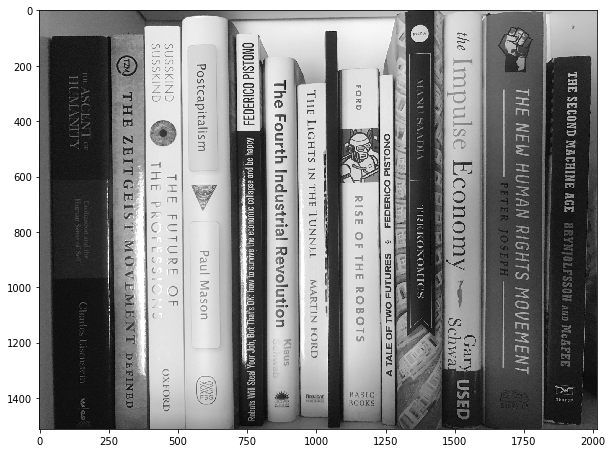

In [5]:
file = './imports/7.jpg'

gray_image = cv2.imread(file, 0)
col_image  = cv2.imread(file)

preview(gray_image, 1)

## 2. Detect correct image orientation 

In [6]:
### we are going to dectect which way the image should be rotated 
### to increase the number of books oriented correctly
### this will save us a lot of time in production when crawling 

h = hor_lines(col_image.copy()) ## detect rotation where we have more horizontal lines then vertical
if h[1]>h[0]: 
    col_image  = image_rotate(col_image, 90) 
    gray_image = image_rotate(gray_image, 90)  

 

In [7]:
   
# g = detect_gibberish(col_image.copy()) # now see if we need to rotate 180 based on where we get more gibberish
# if g[1]>g[0]: 
#     col_image = image_rotate(col_image, 180) 
#     gray_image = image_rotate(gray_image, 180)

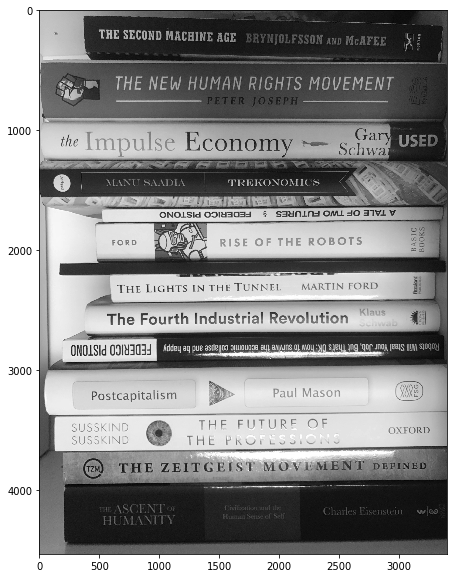

In [8]:
# scale to the size that works well for detection of lines 

scale = 1
new_width = 3*1512*scale

col_image  = cv2.resize(col_image,  (scale*int(col_image.shape[1]* new_width/col_image.shape[0]), new_width )) 
gray_image = cv2.resize(gray_image, (scale*int(gray_image.shape[1]* new_width/gray_image.shape[0]), new_width )) 


preview(gray_image, 1)

## 3. Detect lines that separate books

11

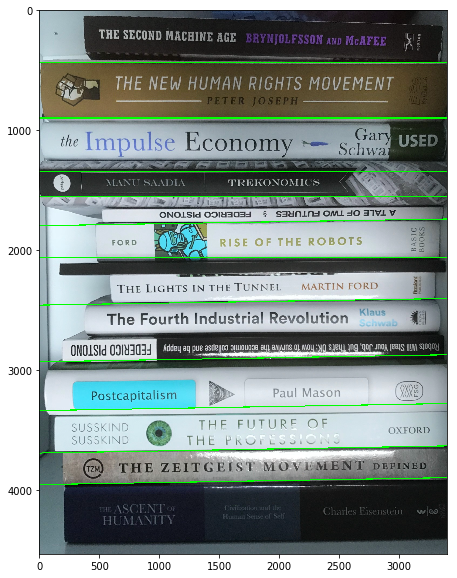

In [9]:
lines_image = col_image.copy()

# -- lines 
lines = lines_detect(lines_image)

### --- filter out short lines (and vertical)

lines_copy = lines.reshape(lines.shape[0],4)
lines_f1 = np.array([line for line in lines_copy if (line[2]-line[0]) > 600])

### sort and then filter by distance

slines = sorted(lines_f1,key=itemgetter(1))

gap = 200 
point = 0
flines = [] # filtered lines

for x in range(0, len(slines)):

    x1,y1,x2,y2 = slines[x]
    if (y1-point)>gap:
        point = y1 
        flines.append(slines[x])


### -- extens lines to edges

for line in range(0, len(flines)):
    
    x1,y1,x2,y2 = flines[line]

    if y2!=y1: 
        
        slope = (y2-y1)/(x2-x1)
        b1 = int(y1 - x1*slope)
        y3 = int((lines_image.shape[1]-1)*slope + b1)

    else:
        b1 = flines[line][1]
        y3 = flines[line][3]
    
    flines[line] = [0,b1,lines_image.shape[1]-1,y3]
        
## preview      
show_lines = lines_image.copy()
show_lines = plot_lines(show_lines, np.array(flines))


preview(show_lines)
len(flines) ## number of  final lines detected 
   

## 4. Cut image into separate books

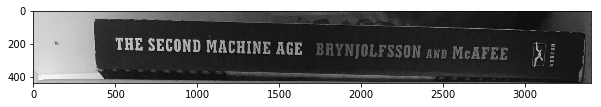

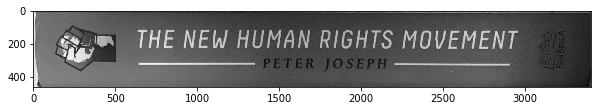

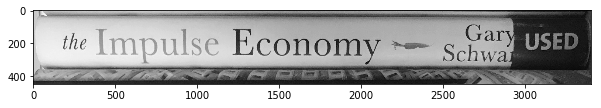

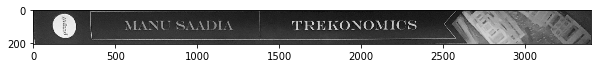

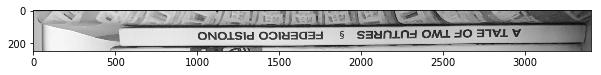

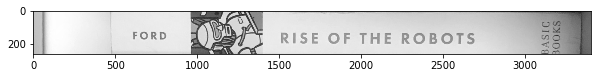

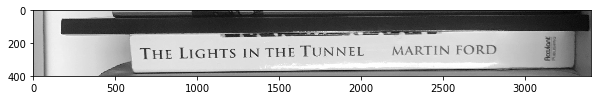

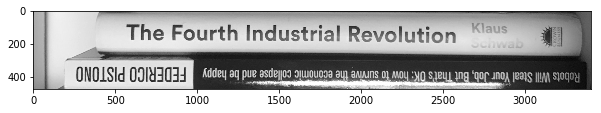

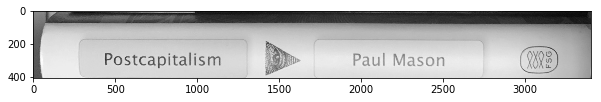

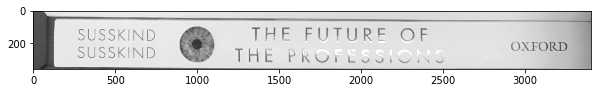

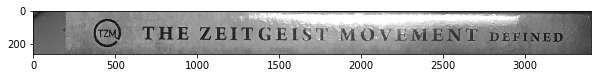

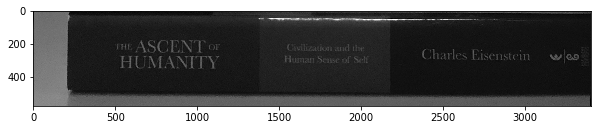

In [10]:
book_images = []

image = gray_image.copy()

for book_n in range(0,len(flines)+1):

    # crop 

    if book_n == 0: t = 0
    else: t = min(flines[book_n-1][1], flines[book_n-1][3])

    if book_n == len(flines): b = image.shape[0]-1
    else: b = max(flines[book_n][3], flines[book_n][1])

    crop = image[t:b, :]

    # find angle
    
    angle = detect_angle(flines[book_n-1])
    if(book_n==0): angle = 0 # *** temporaty fix -- need to get back to this later


    # adjust rotation

    w = crop.shape[1]
    h = crop.shape[0]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(crop, M, (w, h), flags=cv2.INTER_CUBIC)

    # adjust crop 

    adjust = abs(int(math.tan(math.radians(angle))*rotated.shape[1]/2))
    crop_2 = rotated[adjust:rotated.shape[0]-adjust, :]
    
    book_images.append(crop_2)
    
    preview(crop_2, 1)
  

# III. MAIN SECTION: Parse images + crawl Google & Amazon

### Note: this cell will be running for some time!!! (takes about 1-2 minutes for me)

This is where we load chromedriver and crawl Google and Amazon to get info on books

In [11]:
## new function for the main crawling section 

def amazon_crawl(s):
    
    found_book = False
    # --- follow amazon link..
    driver.get(s)
    soup = BeautifulSoup(driver.page_source, "lxml") 

    try: # sometimes we end up in some strange amazon places...
        title = soup.find("meta", {'name': 'title'}).attrs['content']
        if(title[-5:] == 'Books'):
            print("   "+s)
            url_set.add(s)
            found_book = amazon_parse(driver.page_source)
            #n_books += 1
    except: 
        print("   ERR: something is wrong with this link... ")
        print(s) # the strange amazon place.. take a look what's wrong with it
        
    return(found_book)


def google_search(line):
    
    found_book = False
    google = "https://www.google.com/search?q="
    url = google+line
    driver.get(url)
    google_soup = BeautifulSoup(driver.page_source , "lxml")

    if google_soup.find('div', {'class': 'g'}) != None:     

        for cite in google_soup.findAll('cite'):  ### look through all cite(links) in search results
                                                  ### we're searching for www.amazon.com link..       
            if(found_book): break

            ## OK. Google does not make it easy... had some strange a/href overwrites during a crawl; this is a workaround
            s = cite.find_parent().find_parent().find_parent().find_parent().find('a').get('href')

            if s.find('https://www.amazon.com') == 0 and s.find('reviews') == -1 and s not in url_set:

                found_book = amazon_crawl(s)
                
    return(found_book)


In [ ]:
global items 
global url   
   
## -- load chromedriver
path_to_chromedriver = './imports/chromedriver' # change path as needed
options = webdriver.ChromeOptions() 
options.add_argument('headless')

global driver
# driver = webdriver.Chrome(executable_path = path_to_chromedriver) 
driver = webdriver.Chrome(executable_path = path_to_chromedriver, options = options)  ## headless 

url_set = set() 
items = []
item_id = -1


for bn, book in enumerate(book_images):   
    
    stage = 0 ###   0:normal  1:+equalize  2:+rotate  3:+rotate+equalize
    
    print(" ")
    print("_______________ ")
    print(" ")
    print(" IMAGE # {} :".format(bn))
    print("_______________ ")
    print(" ")
     
    expecting = 0
    n_books = 0  # tracker for how many books we've found
        
    while True:    

        if stage > 3: break  
        
        print(" ")
        print("   >> stage {}".format(stage))
        
        equ = False 
        rotation = False 
        
        if stage in (1,3): 
            equ = True
            print("   + equilization")
        
        if stage in (2,3):
            rotation = True
            print("   + rotate")
        
        parsed = parse_book(book.copy(), equ, rotation) # parse text from an image

        print("   "+str(parsed))
        print(" ")

        lines, expect, empty = parsed_analyze(parsed) # analyze it
        
        if not empty and expecting==0 : ### we take a look at how many books we expect only on the first run 
            
            expecting = expect
            end = ""
            if expect != 1 : end = "s"
            print("   expecting {} book{}".format(expect, end))
        
        elif empty: ## parcing didn't detect any text - advancing to next stage 
            stage +=1
            continue

        lines_copy = lines.copy()
        for x in range(len(lines)):

            found_book = False

            # to reduce number of unnecessary crawls, we start with the longest lines first, 
            # which are more likely to be a title
            _, pos = max([(len(x),i) for i, x in enumerate(lines_copy)])
            line = lines_copy.pop(pos)
            print("   line: {}".format(line))

            found_book = google_search(line) # <<--- the rabbit hole down which all the magic happens
#             print("google search result: {}".format(found_book))
            
            if found_book:
                n_books +=1 
                if n_books >= expect: break
            
        print("   books found: "+str(n_books)) # yay! 
        
        
        if n_books==0: stage+=1; continue ### ** temp - reducing to just one book for now to speed things up.. ;
#         if n_books!=expect: stage+=1; continue

        break ## alright, we did everything we can, calling quits on detecting a book from this image

 
_______________ 
 
 IMAGE # 0 :
_______________ 
 
 
   >> stage 0
   ['THE SECUND MACHINE AGE']
 
   expecting 1 book
   line: THE SECUND MACHINE AGE
   https://www.amazon.com/Second-Machine-Age-Prosperity-Technologies/dp/0393350649
   ERR: something is wrong with this link... 
https://www.amazon.com/Second-Machine-Age-Prosperity-Technologies/dp/0393350649
   https://www.amazon.com/Second-Machine-Age-Prosperity-Technologies/dp/1491544821
   ERR: something is wrong with this link... 
https://www.amazon.com/Second-Machine-Age-Prosperity-Technologies/dp/1491544821
   books found: 0
 
   >> stage 1
   + equilization
   ['']
 
 
   >> stage 2
   + rotate
   ['HEW SNIHWW UNBSSS HILL']
 
   line: HEW SNIHWW UNBSSS HILL
   books found: 0
 
   >> stage 3
   + equilization
   + rotate
   ['']
 
 
_______________ 
 
 IMAGE # 1 :
_______________ 
 
 
   >> stage 0
   ['ngu THE NEW HUMAN RIGHTS MOVEMENT']
 
   expecting 1 book
   line: ngu THE NEW HUMAN RIGHTS MOVEMENT
   https://www.amazon.com/

# IV. OUTPUT RESULTS

In [ ]:
pd.DataFrame(items)

In [ ]:
from IPython.display import Image

for i in np.arange(len(items)):

    display(Image(filename='images/'+str(i)+'.jpg'))

    print("___________________________________________________")
    print(" ")
    print('\"',items[i]['title'],'\"')
    print("___________________________________________________")
    print(" ")
    print('author: ',items[i]['author'])
    print('description: ')
    print(items[i]['desription'])

# Ideas to implement next..

1. Need to implement a way for passing/not checking parsed lines again that closely resemble title of any book already discovered. Will save time. \n --> Implement Levenshtein distance


2. create a function that detects line connecting mode of charachter height, to adjust rotation better. 

3. create a funciton that crops image as close to charachter broders with some padding

4. create a good normalization function or a variation on bimodal, perhaps with histogram analysis to detect background 
